In [83]:
PROJECT_PATH = '/content/drive/My Drive/Projects/Mnist-Anomaly-detection/'
import sys
sys.path.append(PROJECT_PATH)

In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from dataset import MnistDataset
from vae import VAE, loss_function
import torch
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [86]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [87]:
net = vae.VAE()
net.load_state_dict(torch.load(os.path.join(PROJECT_PATH, 'weights/vae_epoch_25.pth')))
net.to(device)

VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)

In [88]:
training_data = MnistDataset(os.path.join(PROJECT_PATH, 'data'))
train_dataloader = DataLoader(training_data, batch_size=1, shuffle=False)

In [89]:
data = []
test_loss = []
y_all = []

net.eval()
with torch.no_grad():
  for index, (x, y) in enumerate(train_dataloader):
      x = x.to(device)
      recon_x, mu, logvar = net(x)
      test_loss.append(loss_function(recon_x, x, mu, logvar).item())
      y_all.append(y)

### I'm Going to check the losses.
### If i will have loss bigger than expected  i can say it's anomaly

In [90]:
test_loss = np.asarray(test_loss)

In [91]:
print(test_loss.max())
print(test_loss.min())

7333.27783203125
42.42911148071289


In [92]:
test_loss[test_loss > 2000] = 2000

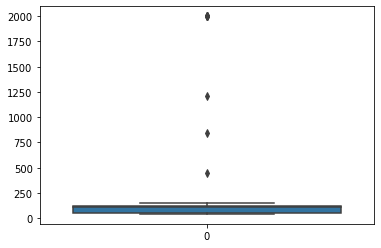

In [93]:
sns.boxplot(data=test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


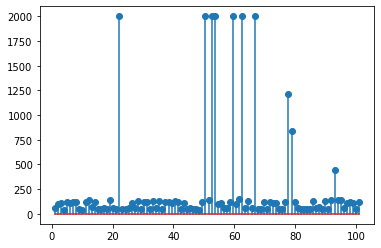

In [94]:
x = np.linspace(1, len(test_loss) + 1, len(test_loss))

plt.stem(x, test_loss)
plt.show()

In [95]:
anomaly_index = np.where(test_loss > 400)
print(anomaly_index)

(array([21, 49, 51, 52, 58, 61, 65, 76, 77, 91]),)


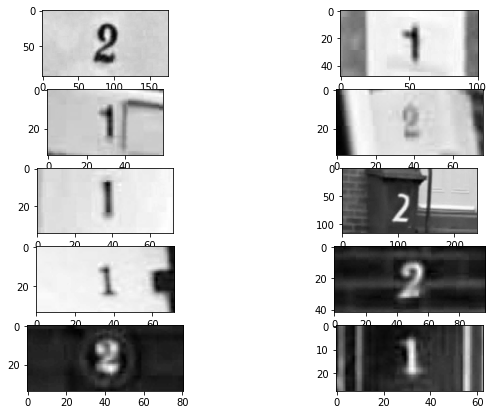

In [96]:
fig, axs = plt.subplots(5, 2, figsize=(10, 7))

for i, ax in enumerate(axs.reshape(-1)):
  index = anomaly_index[0][i]
  img_path = training_data.img_path[index]
  image = cv2.imread(img_path, 0)
  ax.imshow(image, cmap='gray')
fig.show()